# Optimizing Sentiment Analysis On Tokopedia Tokopedia Indonesia Tweets With Text Mining Using Artificial Neural Network and Adaboost Algorithms

<div class="alert-success">
Nama :Dina Merlia Efendi
</div>

<div class="alert-danger">
Github : https://github.com/dinamerlia
</div>

In [7]:
import tweepy
import pandas as pd
from datetime import datetime, timedelta

# Masukkan kunci API Twitter Anda di sini
access_token = '2158348302-Wwdt3ZkWl0Zm7fYVFWNtcC01G1rESpSrKBVXYIJ'
access_token_secret = 'SZ8mlLGspN9BMBdYbmdVa2bdMWoAAdtsqA7f02PvfsZil'
api_key = 'xAWwaRSznOrCpQukB5qvTpNTp'
api_key_secret = 'cLtijiJ7spvMBRPigANzd3KoOPGtO9Lu2IkgkZB46YYJHWOvuc'

# Otentikasi menggunakan kunci API Twitter
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

# Membuat objek API
api = tweepy.API(auth, wait_on_rate_limit=True)

# Menentukan nama akun Twitter yang ingin Anda ambil tweet-nya
search_query = 'Tokopedia'
language = 'id'

# Menghitung tanggal 14 hari yang lalu
end_date = datetime(2023, 5, 10)
start_date = end_date - timedelta(days=13)

# Mengumpulkan tweet dalam rentang tanggal yang ditentukan
tweets = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name=search_query, tweet_mode='extended').items():
    if tweet.created_at.date() < start_date.date():
        break
    if tweet.created_at.date() > end_date.date():
        continue
    tweets.append({
        'created_at': tweet.created_at,
        'text': tweet.full_text
    })

# Membuat DataFrame dari tweet yang terkumpul
df = pd.DataFrame(tweets)
(df)

,created_at,text
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻
...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give..."
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...


In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Menerapkan analisis sentimen ke setiap tweet
sentiments = []

for index, row in df.iterrows():
    text = row['text']
    sentiment = sid.polarity_scores(text)
    sentiments.append(sentiment)

# Menambahkan kolom sentimen ke dalam DataFrame
df['sentiment'] = sentiments

# Mengklasifikasikan sentimen menjadi positive, netral, dan negative
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0 else 'negative' if x['compound'] < 0 else 'neutral')

# Menampilkan DataFrame hasil analisis sentimen
(df[['created_at', 'text', 'sentiment_category']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,created_at,text,sentiment_category
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,neutral
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,positive
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,neutral
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,neutral
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,negative
...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,neutral
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,neutral
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...",neutral
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,neutral


In [11]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('tweets.csv', index=False)

In [12]:
df['sentiment_category'].value_counts()

neutral     965
negative     90
positive     73
Name: sentiment_category, dtype: int64

In [13]:
import numpy as np
x=np.asarray(df)
print(x)

[[Timestamp('2023-05-10 14:24:11+0000', tz='UTC')
  'RT @tokopedia: Ayo trendingin kalo kamu sayang Jimin!😭💜\n\nAkhirnya Jimin kita comeback lagiiii gengsss😭\U0001faf6🏻\U0001faf6🏻\n\nANGEL PT. 1 IS COMING\nJIMIN FOR…'
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 'neutral']
 [Timestamp('2023-05-10 14:00:43+0000', tz='UTC')
  '@Agus_Esje Halo Toppers. Terkait kendala pembayarannya, dapat dijelaskan secara detail beserta screenshot halaman yang berkendala melalui DM untuk dibantu cek lebih lanjut ya. Kami tunggu konfirmasinya :)'
  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.4588} 'positive']
 [Timestamp('2023-05-10 13:43:53+0000', tz='UTC')
  '@debit_kredit_ Kenapa part itu kak?'
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 'neutral']
 ...
 [Timestamp('2023-04-27 16:38:14+0000', tz='UTC')
  '@andy_pradana_87 @OPPOIndonesia Semangat, giveaway yang terbaru kakkk😍😍🗿🗿'
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 'neutral']
 [Timestamp('2023-04-27 

In [14]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

df['sentiment_category'] = label_encoder.fit_transform(df['sentiment_category'])

df

,created_at,text,sentiment,sentiment_category
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0
...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1


In [15]:
df['sentiment_category'].value_counts()

1    965
0     90
2     73
Name: sentiment_category, dtype: int64

In [16]:
df['sentiment_category']

0       1
1       2
2       1
3       1
4       0
       ..
1123    1
1124    1
1125    1
1126    1
1127    0
Name: sentiment_category, Length: 1128, dtype: int64

In [17]:
print(df['sentiment'].apply(lambda x: x['compound']))

0       0.0000
1       0.4588
2       0.0000
3       0.0000
4      -0.1027
         ...  
1123    0.0000
1124    0.0000
1125    0.0000
1126    0.0000
1127   -0.0772
Name: sentiment, Length: 1128, dtype: float64


In [18]:
df.isnull().sum()

created_at            0
text                  0
sentiment             0
sentiment_category    0
dtype: int64

In [19]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [20]:
import numpy as np
import pandas as pd
import nltk
import string
import re

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#import stopword
from nltk.corpus import stopwords

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

NLP (Natural Language Processing)

Remove username

In [21]:
def remove_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet
df['remove_user'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df

,created_at,text,sentiment,sentiment_category,remove_user
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜\...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ..."
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻
...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿"
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪


Remove Tabulation

In [22]:
def remove_tabs(df, label):
    df[label] = df[label].apply(lambda x: x.replace("\n", " "))
    df[label] = df[label].apply(lambda x: x.replace("\r", " "))
    df[label] = df[label].apply(lambda x: x.replace("\t", " "))
    return df
#
df = remove_tabs(df, "remove_user")
df

,created_at,text,sentiment,sentiment_category,remove_user
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ..."
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻
...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿"
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪


In [23]:
def remove_punctuation(series):
    text = "".join([word for word in series if word not in string.punctuation])
    return text
df['remove_punc'] = df['remove_user'].apply(remove_punctuation)
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻
...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪


In [24]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['remove_emoji'] = df['remove_punc'].apply(lambda x : remove_emoji(x))
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akh...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya da...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak 🤟
...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihhh awww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah🤣 di tengah Minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakkk
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪


In [25]:
# Clean text

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Apply functions on OriginalTweet
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : remove_url(x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : seperate_alphanumeric(x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : unique_char(cont_rep_char,x))
df['remove_emoji'] = df['remove_emoji'].apply(lambda x : char(x))
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akhir...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya dap...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaa berwarna banget hidupmu kak
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak
...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihh aww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah di tengah Minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakk
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak


In [26]:
df['case_folding'] = df['remove_emoji'].apply(lambda x : x.lower())
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akhir...,rt ayo trendingin kalo kamu sayang jimin akhir...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya dap...,halo toppers terkait kendala pembayarannya dap...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak,kenapa part itu kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaa berwarna banget hidupmu kak,aaa berwarna banget hidupmu kak
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak,ur bias siapa kak
...,...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihh aww,black paling mewah sihh aww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah di tengah Minto wkk,black punk kah di tengah minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakk,semangat giveaway yang terbaru kakk
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak,biar elegan yaa kak


In [27]:
df.drop_duplicates(subset='case_folding', keep = 'first', inplace=True)
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akhir...,rt ayo trendingin kalo kamu sayang jimin akhir...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya dap...,halo toppers terkait kendala pembayarannya dap...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak,kenapa part itu kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaa berwarna banget hidupmu kak,aaa berwarna banget hidupmu kak
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak,ur bias siapa kak
...,...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihh aww,black paling mewah sihh aww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah di tengah Minto wkk,black punk kah di tengah minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakk,semangat giveaway yang terbaru kakk
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak,biar elegan yaa kak


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stopwords_indonesia = stopwords.words('indonesian')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean
df['tweet_clean'] = df['case_folding'].apply(lambda x: clean_tweets(x))
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akhir...,rt ayo trendingin kalo kamu sayang jimin akhir...,"[rt, ayo, trendingin, kalo, sayang, jimin, jim..."
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya dap...,halo toppers terkait kendala pembayarannya dap...,"[halo, toppers, kait, kendala, bayar, detail, ..."
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak,kenapa part itu kak,"[part, kak]"
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaa berwarna banget hidupmu kak,aaa berwarna banget hidupmu kak,"[aaa, warna, banget, hidup, kak]"
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak,ur bias siapa kak,"[ur, bias, kak]"
...,...,...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihh aww,black paling mewah sihh aww,"[black, mewah, sihh, aww]"
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah di tengah Minto wkk,black punk kah di tengah minto wkk,"[black, punk, kah, minto, wkk]"
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakk,semangat giveaway yang terbaru kakk,"[semangat, giveaway, baru, kakk]"
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak,biar elegan yaa kak,"[biar, elegan, yaa, kak]"


In [30]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['Text'] = df['tweet_clean'].apply(lambda x: remove_punct(x))
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Text
0,2023-05-10 14:24:11+00:00,RT @tokopedia: Ayo trendingin kalo kamu sayang...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,RT : Ayo trendingin kalo kamu sayang Jimin!😭💜 ...,RT Ayo trendingin kalo kamu sayang Jimin😭💜 A...,RT Ayo trendingin kalo kamu sayang Jimin Akhir...,rt ayo trendingin kalo kamu sayang jimin akhir...,"[rt, ayo, trendingin, kalo, sayang, jimin, jim...",rt ayo trendingin kalo sayang jimin jimin come...
1,2023-05-10 14:00:43+00:00,@Agus_Esje Halo Toppers. Terkait kendala pemba...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",2,"Halo Toppers. Terkait kendala pembayarannya, ...",Halo Toppers Terkait kendala pembayarannya da...,Halo Toppers Terkait kendala pembayarannya dap...,halo toppers terkait kendala pembayarannya dap...,"[halo, toppers, kait, kendala, bayar, detail, ...",halo toppers kait kendala bayar detail serta s...
2,2023-05-10 13:43:53+00:00,@debit_kredit_ Kenapa part itu kak?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Kenapa part itu kak?,Kenapa part itu kak,Kenapa part itu kak,kenapa part itu kak,"[part, kak]",part kak
3,2023-05-10 13:43:33+00:00,@losaisngeles Aaaa berwarna banget hidupmu kak😭🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa berwarna banget hidupmu kak😭🔥,Aaaa berwarna banget hidupmu kak😭🔥,Aaa berwarna banget hidupmu kak,aaa berwarna banget hidupmu kak,"[aaa, warna, banget, hidup, kak]",aaa warna banget hidup kak
4,2023-05-10 13:43:02+00:00,@rnggptr Ur bias siapa kak? 🤟🏻,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0,Ur bias siapa kak? 🤟🏻,Ur bias siapa kak 🤟🏻,Ur bias siapa kak,ur bias siapa kak,"[ur, bias, kak]",ur bias kak
...,...,...,...,...,...,...,...,...,...,...
1123,2023-04-27 16:39:14+00:00,@andy_pradana_87 @OPPOIndonesia Black paling m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black paling mewah sihhh awww,Black paling mewah sihhh awww,Black paling mewah sihh aww,black paling mewah sihh aww,"[black, mewah, sihh, aww]",black mewah sihh aww
1124,2023-04-27 16:38:55+00:00,@andy_pradana_87 @OPPOIndonesia Black punk kah...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah😭🤣 di tengah Minto wkk,Black punk kah di tengah Minto wkk,black punk kah di tengah minto wkk,"[black, punk, kah, minto, wkk]",black punk kah minto wkk
1125,2023-04-27 16:38:14+00:00,"@andy_pradana_87 @OPPOIndonesia Semangat, give...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,"Semangat, giveaway yang terbaru kakkk😍😍🗿🗿",Semangat giveaway yang terbaru kakkk😍😍🗿🗿,Semangat giveaway yang terbaru kakk,semangat giveaway yang terbaru kakk,"[semangat, giveaway, baru, kakk]",semangat giveaway baru kakk
1126,2023-04-27 16:37:11+00:00,@andy_pradana_87 @OPPOIndonesia Biar elegan ya...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Biar elegan yaa kak🤪,Biar elegan yaa kak🤪,Biar elegan yaa kak,biar elegan yaa kak,"[biar, elegan, yaa, kak]",biar elegan yaa kak


In [31]:
df.sort_values("Text", inplace = True)
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Text
158,2023-05-08 06:44:02+00:00,@baksojoshy Boleh kan tapi?😌,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Boleh kan tapi?😌,Boleh kan tapi😌,Boleh kan tapi,boleh kan tapi,[],
701,2023-04-29 12:51:29+00:00,@Catslave83 @OPPOIndonesia 💚💚💚💚💚,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,💚💚💚💚💚,💚💚💚💚💚,,,[],
70,2023-05-09 13:56:05+00:00,@Eunbiching Aaaa bener2 jadi mood banget😭🔥🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa bener2 jadi mood banget😭🔥🔥,Aaaa bener2 jadi mood banget😭🔥🔥,Aaa bener jadi mood banget,aaa bener jadi mood banget,"[aaa, bener, mood, banget]",aaa bener mood banget
205,2023-05-07 07:15:06+00:00,@Minhasol7 Aaaaaaa borahae kakkk💜💜,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaaaaa borahae kakkk💜💜,Aaaaaaa borahae kakkk💜💜,Aaa borahae kakk,aaa borahae kakk,"[aaa, borahae, kakk]",aaa borahae kakk
271,2023-05-06 12:16:20+00:00,@DN_W94 Aaaa cutee💜 always support,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",2,Aaaa cutee💜 always support,Aaaa cutee💜 always support,Aaa cutee always support,aaa cutee always support,"[aaa, cutee, always, support]",aaa cutee always support
...,...,...,...,...,...,...,...,...,...,...
15,2023-05-10 00:25:54+00:00,@edwarsby Yaudah kerjaaaanyaaa semangattt kakk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah kerjaaaanyaaa semangattt kakkkkk!! Bia...,Yaudah kerjaaaanyaaa semangattt kakkkkk Biar ...,Yaudah kerjaanyaa semangatt kakk Biar soon tin...,yaudah kerjaanyaa semangatt kakk biar soon tin...,"[yaudah, kerjaanyaa, semangatt, kakk, biar, so...",yaudah kerjaanyaa semangatt kakk biar soon tin...
480,2023-05-02 11:29:04+00:00,@IR080483 @OPPOIndonesia Yaudah pas rumit buka...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak,yaudah pas rumit buka foto minto aja kak,"[yaudah, pas, rumit, buka, foto, minto, aja, kak]",yaudah pas rumit buka foto minto aja kak
394,2023-05-04 04:31:20+00:00,@bada_wiwoho Yeaaaa kakk🤌🏻,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yeaaaa kakk🤌🏻,Yeaaaa kakk🤌🏻,Yeaa kakk,yeaa kakk,"[yeaa, kakk]",yeaa kakk
38,2023-05-10 00:11:05+00:00,@lexyGummy Yoo yooo support terus Jiminnya 😍💜💜,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",2,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yoo support terus Jiminnya,yoo yoo support terus jiminnya,"[yoo, yoo, support, jiminnya]",yoo yoo support jiminnya


In [32]:
df.drop_duplicates(subset ="Text", keep = 'first', inplace = True)
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Text
158,2023-05-08 06:44:02+00:00,@baksojoshy Boleh kan tapi?😌,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Boleh kan tapi?😌,Boleh kan tapi😌,Boleh kan tapi,boleh kan tapi,[],
70,2023-05-09 13:56:05+00:00,@Eunbiching Aaaa bener2 jadi mood banget😭🔥🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa bener2 jadi mood banget😭🔥🔥,Aaaa bener2 jadi mood banget😭🔥🔥,Aaa bener jadi mood banget,aaa bener jadi mood banget,"[aaa, bener, mood, banget]",aaa bener mood banget
205,2023-05-07 07:15:06+00:00,@Minhasol7 Aaaaaaa borahae kakkk💜💜,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaaaaa borahae kakkk💜💜,Aaaaaaa borahae kakkk💜💜,Aaa borahae kakk,aaa borahae kakk,"[aaa, borahae, kakk]",aaa borahae kakk
271,2023-05-06 12:16:20+00:00,@DN_W94 Aaaa cutee💜 always support,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",2,Aaaa cutee💜 always support,Aaaa cutee💜 always support,Aaa cutee always support,aaa cutee always support,"[aaa, cutee, always, support]",aaa cutee always support
512,2023-05-02 08:47:30+00:00,@alpaca395251 Aaaaaa😍😍 excited banget kann kakkk,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",2,Aaaaaa😍😍 excited banget kann kakkk,Aaaaaa😍😍 excited banget kann kakkk,Aaa excited banget kann kakk,aaa excited banget kann kakk,"[aaa, excited, banget, kann, kakk]",aaa excited banget kann kakk
...,...,...,...,...,...,...,...,...,...,...
15,2023-05-10 00:25:54+00:00,@edwarsby Yaudah kerjaaaanyaaa semangattt kakk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah kerjaaaanyaaa semangattt kakkkkk!! Bia...,Yaudah kerjaaaanyaaa semangattt kakkkkk Biar ...,Yaudah kerjaanyaa semangatt kakk Biar soon tin...,yaudah kerjaanyaa semangatt kakk biar soon tin...,"[yaudah, kerjaanyaa, semangatt, kakk, biar, so...",yaudah kerjaanyaa semangatt kakk biar soon tin...
480,2023-05-02 11:29:04+00:00,@IR080483 @OPPOIndonesia Yaudah pas rumit buka...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak,yaudah pas rumit buka foto minto aja kak,"[yaudah, pas, rumit, buka, foto, minto, aja, kak]",yaudah pas rumit buka foto minto aja kak
394,2023-05-04 04:31:20+00:00,@bada_wiwoho Yeaaaa kakk🤌🏻,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yeaaaa kakk🤌🏻,Yeaaaa kakk🤌🏻,Yeaa kakk,yeaa kakk,"[yeaa, kakk]",yeaa kakk
38,2023-05-10 00:11:05+00:00,@lexyGummy Yoo yooo support terus Jiminnya 😍💜💜,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",2,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yoo support terus Jiminnya,yoo yoo support terus jiminnya,"[yoo, yoo, support, jiminnya]",yoo yoo support jiminnya


In [33]:
df.to_csv('output.csv',encoding='utf8', index=False)
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Text
158,2023-05-08 06:44:02+00:00,@baksojoshy Boleh kan tapi?😌,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Boleh kan tapi?😌,Boleh kan tapi😌,Boleh kan tapi,boleh kan tapi,[],
70,2023-05-09 13:56:05+00:00,@Eunbiching Aaaa bener2 jadi mood banget😭🔥🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa bener2 jadi mood banget😭🔥🔥,Aaaa bener2 jadi mood banget😭🔥🔥,Aaa bener jadi mood banget,aaa bener jadi mood banget,"[aaa, bener, mood, banget]",aaa bener mood banget
205,2023-05-07 07:15:06+00:00,@Minhasol7 Aaaaaaa borahae kakkk💜💜,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaaaaa borahae kakkk💜💜,Aaaaaaa borahae kakkk💜💜,Aaa borahae kakk,aaa borahae kakk,"[aaa, borahae, kakk]",aaa borahae kakk
271,2023-05-06 12:16:20+00:00,@DN_W94 Aaaa cutee💜 always support,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",2,Aaaa cutee💜 always support,Aaaa cutee💜 always support,Aaa cutee always support,aaa cutee always support,"[aaa, cutee, always, support]",aaa cutee always support
512,2023-05-02 08:47:30+00:00,@alpaca395251 Aaaaaa😍😍 excited banget kann kakkk,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",2,Aaaaaa😍😍 excited banget kann kakkk,Aaaaaa😍😍 excited banget kann kakkk,Aaa excited banget kann kakk,aaa excited banget kann kakk,"[aaa, excited, banget, kann, kakk]",aaa excited banget kann kakk
...,...,...,...,...,...,...,...,...,...,...
15,2023-05-10 00:25:54+00:00,@edwarsby Yaudah kerjaaaanyaaa semangattt kakk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah kerjaaaanyaaa semangattt kakkkkk!! Bia...,Yaudah kerjaaaanyaaa semangattt kakkkkk Biar ...,Yaudah kerjaanyaa semangatt kakk Biar soon tin...,yaudah kerjaanyaa semangatt kakk biar soon tin...,"[yaudah, kerjaanyaa, semangatt, kakk, biar, so...",yaudah kerjaanyaa semangatt kakk biar soon tin...
480,2023-05-02 11:29:04+00:00,@IR080483 @OPPOIndonesia Yaudah pas rumit buka...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak,yaudah pas rumit buka foto minto aja kak,"[yaudah, pas, rumit, buka, foto, minto, aja, kak]",yaudah pas rumit buka foto minto aja kak
394,2023-05-04 04:31:20+00:00,@bada_wiwoho Yeaaaa kakk🤌🏻,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yeaaaa kakk🤌🏻,Yeaaaa kakk🤌🏻,Yeaa kakk,yeaa kakk,"[yeaa, kakk]",yeaa kakk
38,2023-05-10 00:11:05+00:00,@lexyGummy Yoo yooo support terus Jiminnya 😍💜💜,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",2,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yoo support terus Jiminnya,yoo yoo support terus jiminnya,"[yoo, yoo, support, jiminnya]",yoo yoo support jiminnya


In [34]:
df

,created_at,text,sentiment,sentiment_category,remove_user,remove_punc,remove_emoji,case_folding,tweet_clean,Text
158,2023-05-08 06:44:02+00:00,@baksojoshy Boleh kan tapi?😌,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Boleh kan tapi?😌,Boleh kan tapi😌,Boleh kan tapi,boleh kan tapi,[],
70,2023-05-09 13:56:05+00:00,@Eunbiching Aaaa bener2 jadi mood banget😭🔥🔥,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaa bener2 jadi mood banget😭🔥🔥,Aaaa bener2 jadi mood banget😭🔥🔥,Aaa bener jadi mood banget,aaa bener jadi mood banget,"[aaa, bener, mood, banget]",aaa bener mood banget
205,2023-05-07 07:15:06+00:00,@Minhasol7 Aaaaaaa borahae kakkk💜💜,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Aaaaaaa borahae kakkk💜💜,Aaaaaaa borahae kakkk💜💜,Aaa borahae kakk,aaa borahae kakk,"[aaa, borahae, kakk]",aaa borahae kakk
271,2023-05-06 12:16:20+00:00,@DN_W94 Aaaa cutee💜 always support,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",2,Aaaa cutee💜 always support,Aaaa cutee💜 always support,Aaa cutee always support,aaa cutee always support,"[aaa, cutee, always, support]",aaa cutee always support
512,2023-05-02 08:47:30+00:00,@alpaca395251 Aaaaaa😍😍 excited banget kann kakkk,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",2,Aaaaaa😍😍 excited banget kann kakkk,Aaaaaa😍😍 excited banget kann kakkk,Aaa excited banget kann kakk,aaa excited banget kann kakk,"[aaa, excited, banget, kann, kakk]",aaa excited banget kann kakk
...,...,...,...,...,...,...,...,...,...,...
15,2023-05-10 00:25:54+00:00,@edwarsby Yaudah kerjaaaanyaaa semangattt kakk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah kerjaaaanyaaa semangattt kakkkkk!! Bia...,Yaudah kerjaaaanyaaa semangattt kakkkkk Biar ...,Yaudah kerjaanyaa semangatt kakk Biar soon tin...,yaudah kerjaanyaa semangatt kakk biar soon tin...,"[yaudah, kerjaanyaa, semangatt, kakk, biar, so...",yaudah kerjaanyaa semangatt kakk biar soon tin...
480,2023-05-02 11:29:04+00:00,@IR080483 @OPPOIndonesia Yaudah pas rumit buka...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak😭😭,Yaudah pas rumit buka foto Minto aja kak,yaudah pas rumit buka foto minto aja kak,"[yaudah, pas, rumit, buka, foto, minto, aja, kak]",yaudah pas rumit buka foto minto aja kak
394,2023-05-04 04:31:20+00:00,@bada_wiwoho Yeaaaa kakk🤌🏻,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1,Yeaaaa kakk🤌🏻,Yeaaaa kakk🤌🏻,Yeaa kakk,yeaa kakk,"[yeaa, kakk]",yeaa kakk
38,2023-05-10 00:11:05+00:00,@lexyGummy Yoo yooo support terus Jiminnya 😍💜💜,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",2,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yooo support terus Jiminnya 😍💜💜,Yoo yoo support terus Jiminnya,yoo yoo support terus jiminnya,"[yoo, yoo, support, jiminnya]",yoo yoo support jiminnya


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [36]:
BOW = CountVectorizer()
X = df['text'].copy()
X_Bow = BOW.fit_transform(X)

y = df['sentiment_category']

X_train_Bow, X_test_Bow, y_train_Bow, y_test_Bow = train_test_split(X_Bow, y, test_size=0.2, random_state=42)
X_train_Bow.shape, X_test_Bow.shape, y_train_Bow.shape, y_test_Bow.shape

((891, 2918), (223, 2918), (891,), (223,))

In [49]:
# Membangun model ANN untuk X_train_Bow
model = Sequential()
model.add(Dense(16, input_dim=X_train_Bow.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                46704     
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 46,721
Trainable params: 46,721
Non-trainable params: 0
_________________________________________________________________


In [50]:
print ('accuracy_score: ',accuracy_score(y_test_Bow,y_pred_Bow))

accuracy_score:  0.9417040358744395


In [51]:
AdaBoost_Bow = AdaBoostClassifier()
AdaBoost_Bow.fit(X_train_Bow, y_train_Bow)

AdaBoostClassifier()

In [52]:
y_pred_Bow = AdaBoost_Bow.predict(X_test_Bow)
y_pred_Bow

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [53]:
y_test_Bow

622     1
959     1
394     1
601     1
1063    1
       ..
1018    1
173     1
866     1
928     1
942     1
Name: sentiment_category, Length: 223, dtype: int64

In [54]:
print('accuracy',accuracy_score(y_test_Bow, y_pred_Bow))

accuracy 0.9417040358744395


In [55]:
print(classification_report(y_test_Bow, y_pred_Bow))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.96      0.99      0.98       194
           2       0.62      0.36      0.45        14

    accuracy                           0.94       223
   macro avg       0.81      0.72      0.75       223
weighted avg       0.93      0.94      0.93       223



In [56]:
cm = confusion_matrix(y_test_Bow, y_pred_Bow)
cm

array([[ 12,   1,   2],
       [  0, 193,   1],
       [  2,   7,   5]])

Text(0.5, 1.0, 'Confusion Matrix Model')

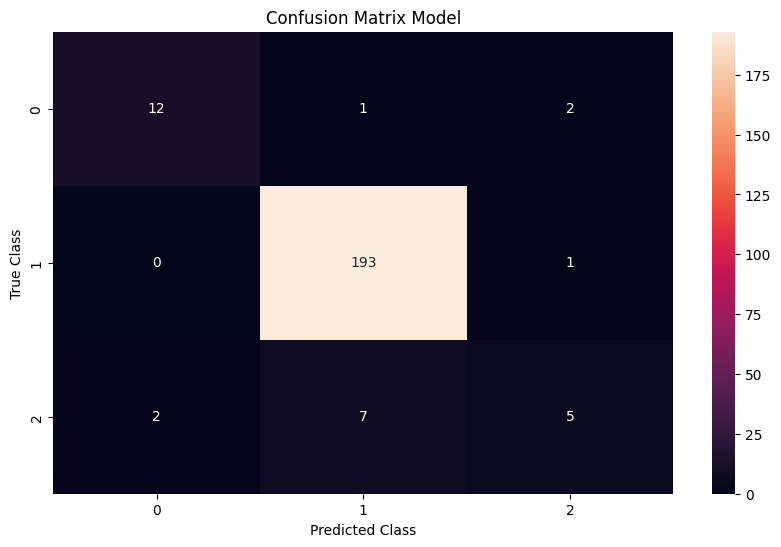

In [57]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")